In [107]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
#Lendo o dataset
car = pd.read_csv("CarPrice_Assignment.csv")

Legenda do dataset

|Col2           |Col3                                                                                                                  |
|---------------|----------------------------------------------------------------------------------------------------------------------|
|Car_ID			|   Unique id of each observation (Interger)|
|Symboling 		| 	Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty|
|carCompany		| 	Name of car company (Categorical)|	
|fueltype		| 	Car fuel type i.e gas or diesel (Categorical)|	
|aspiration		| 	Aspiration used in a car (Categorical)|
|doornumber		| 	Number of doors in a car (Categorical)|	
|carbody		| 	body of car (Categorical)|	
|drivewheel		| 	type of drive wheel (Categorical)|	
|enginelocation	| 	Location of car engine (Categorical)|	
|wheelbase		| 	Weelbase of car (Numeric)|		
|carlength		| 	Length of car (Numeric)|		
|carwidth		| 	Width of car (Numeric)	|	
|carheight		| 	height of car (Numeric)|	
|curbweight		| 	The weight of a car without occupants or baggage. (Numeric)|	
|enginetype		| 	Type of engine. (Categorical)|
|cylindernumber	| 	cylinder placed in the car (Categorical)|	
|enginesize		| 	Size of car (Numeric)|
|fuelsystem		| 	Fuel system of car (Categorical)|	
|boreratio		| 	Boreratio of car (Numeric)|
|stroke			|   Stroke or volume inside the engine (Numeric)|	
|compressionratio| 	compression ratio of car (Numeric)|
|horsepower		| 	Horsepower (Numeric)|
|peakrpm		| 	car peak rpm (Numeric)|	
|citympg		| 	Mileage in city (Numeric)|		
|highwaympg		| 	Mileage on highway (Numeric)|	
|price(Dependent|   variable)			Price of car (Numeric)|	

In [ ]:
#Verificando os tipos de dados e dados nulos no dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#Estatísticas descritivas do dataset
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
#Separando o dataset somente com variáveis numéricas
correlations = car[['carheight', 'carlength', 'carwidth' , 
                 'enginesize',
                 'horsepower',
                 'peakrpm',
                 'citympg',
                 'highwaympg', 'price']]

<Axes: >

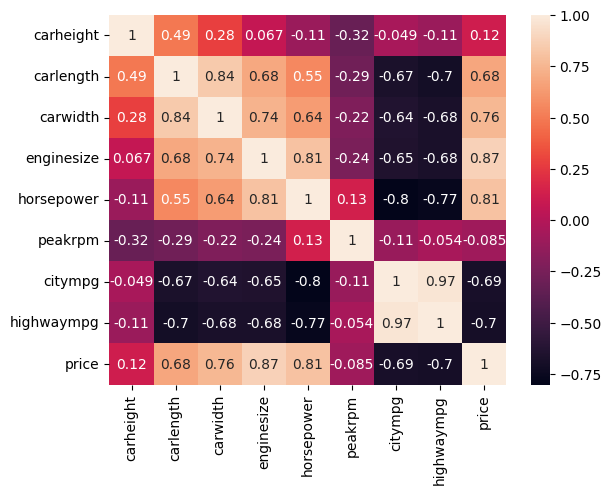

In [ ]:
#Verificando as correlações
sns.heatmap(correlations.corr(), annot=True)

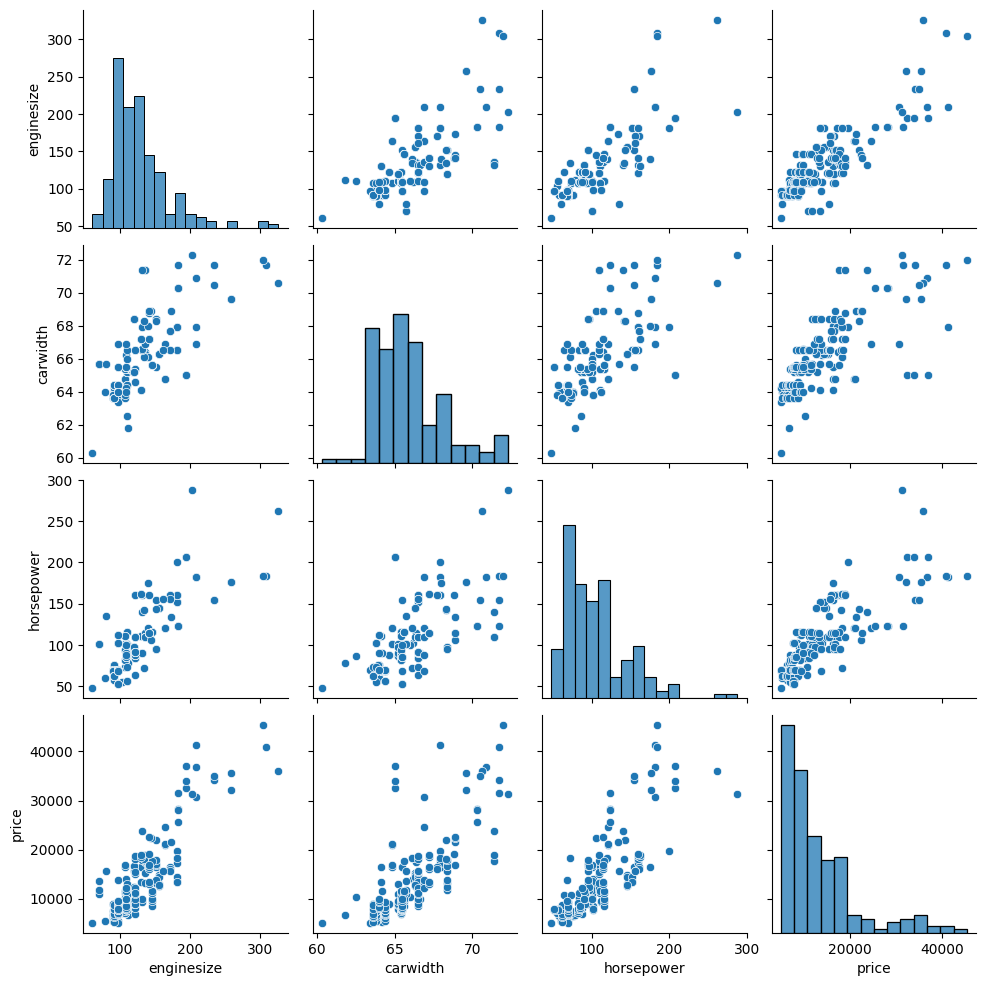

In [ ]:
#Verificando graficamente as correlações positivas
sns.pairplot(car[['enginesize', 'carwidth', 'horsepower', 'price']])
plt.show()

- Horsepower, EngineSize, Carwidth - Correlações positivas e altas em relação ao preço do carro
- citympg, highwaympg - Correlações negativas quanto ao preço do carro


Simple linear regression

In [ ]:
#Rodando um modelo linear simples apenas com o preço e o tamanho do motor
modelo = sm.OLS.from_formula("price ~ enginesize", data=car).fit()
print(modelo.summary())

salvando os fittedvalues

In [ ]:
#Salvando os valores previstos e os erros no dataset para análise
car['Price_fitted'] = modelo.fittedvalues
car['erros'] = modelo.resid

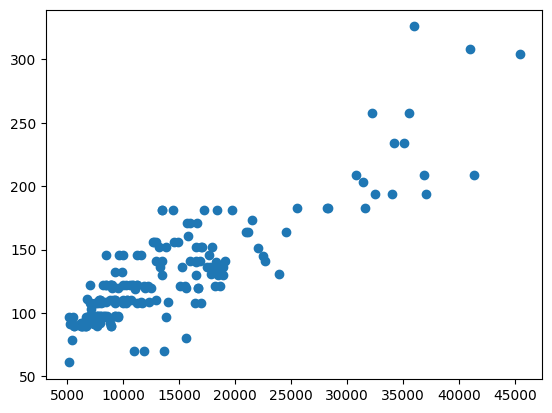

In [ ]:
plt.scatter(car['price'], car['enginesize'])

Intervalo de confianca em 90%

<function matplotlib.pyplot.show(close=None, block=None)>

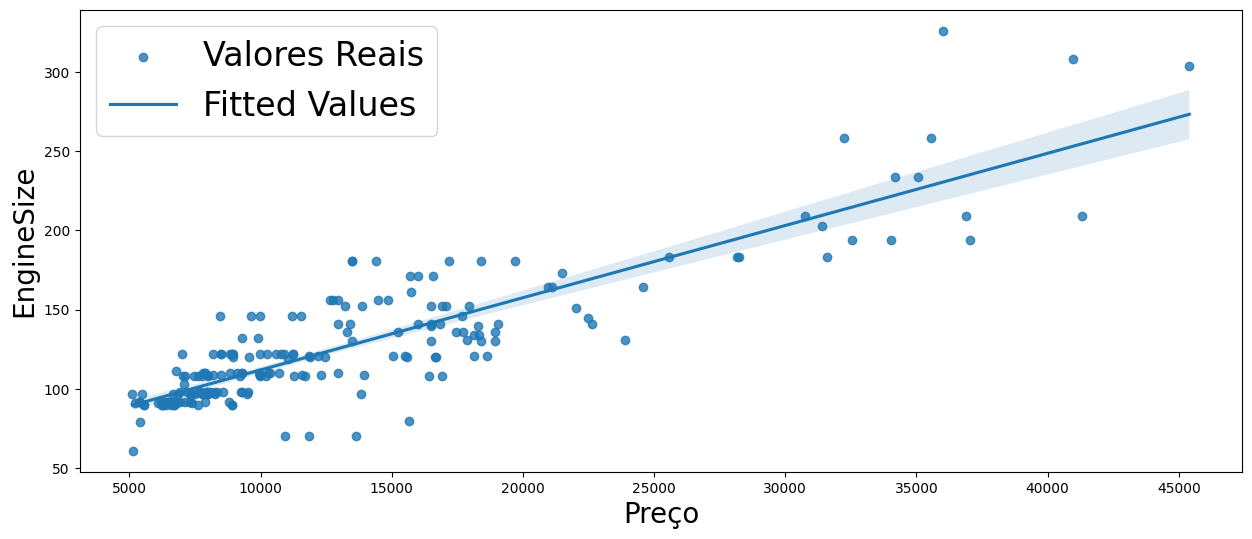

In [ ]:
plt.figure(figsize=(15,6))
sns.regplot(data=car, x=car['price'], y=car['enginesize'], ci=90)
plt.xlabel('Preço', fontsize=20)
plt.ylabel('EngineSize', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

Intervalo de confianca em 95%

<function matplotlib.pyplot.show(close=None, block=None)>

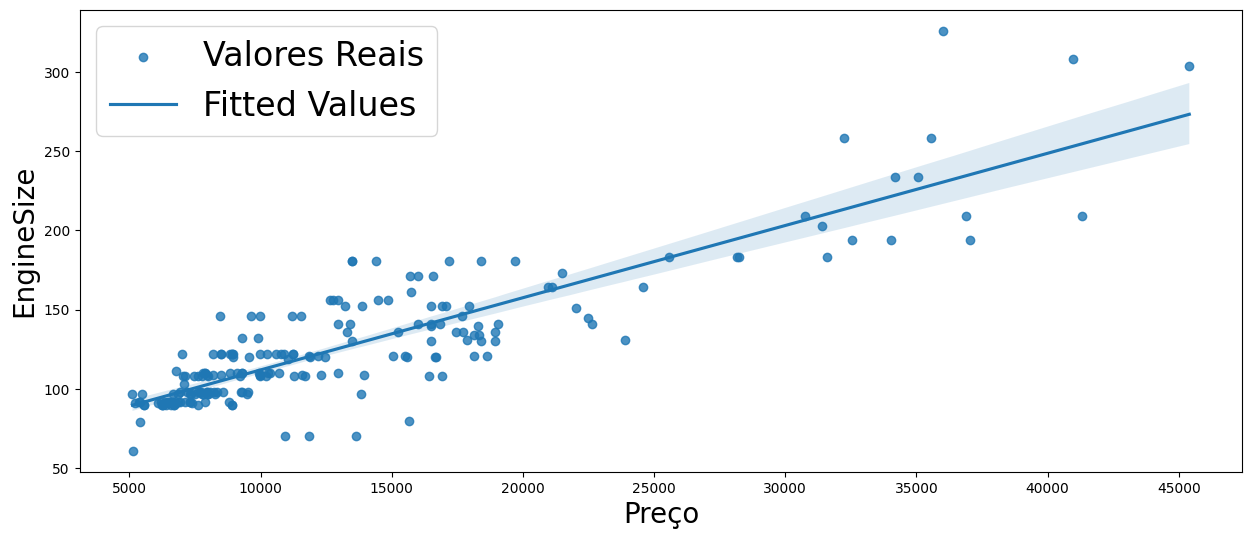

In [ ]:
plt.figure(figsize=(15,6))
sns.regplot(data=car, x=car['price'], y=car['enginesize'], ci=95)
plt.xlabel('Preço', fontsize=20)
plt.ylabel('EngineSize', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

Intervalo de confianca em 99%

<function matplotlib.pyplot.show(close=None, block=None)>

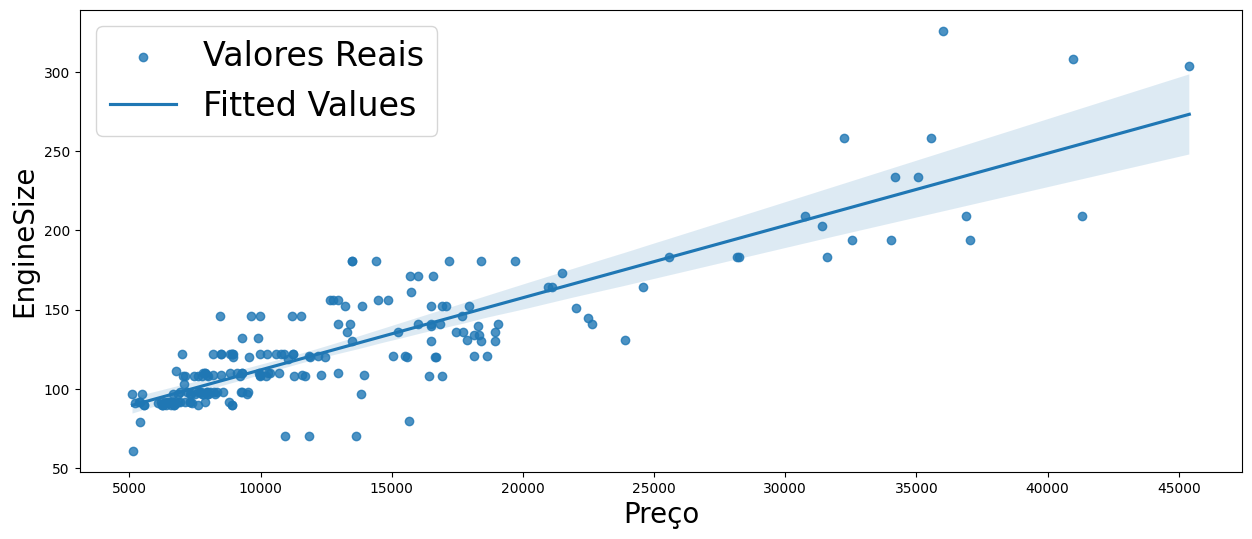

In [ ]:
plt.figure(figsize=(15,6))
sns.regplot(data=car, x=car['price'], y=car['enginesize'], ci=99)
plt.xlabel('Preço', fontsize=20)
plt.ylabel('EngineSize', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

Prevendo um valor para o tamanho do motor

In [17]:
modelo.predict(pd.DataFrame({'enginesize':[258]}))

0    35260.745898
dtype: float64

<h2>Métrica R²:</h2>  
<br></br> O valor do R² tem como objetivo explicar quanto as variáveis independentes explicam o comportamento da variável dependente, um R² alto não significa que o modelo é bom, podemos ter variáveis demais que estão na verdade dificultando a performance do modelo. 
<br></br> Um R² negativo, significa que as variáveis independentes não explicam em nada o comportamento da variável dependente.

<h2>Regressão Linear Multipla<h2>

Verificando as correlações para saber as variáveis que possuem uma correlação positiva ou negativa com minha variável dependente <br></br>

<strong>Por exemplo:</strong> EngineSize tem uma correlação de 87% ou seja, é muito provável que quanto maior for o tamanho do motor mais caro será o carro

In [ ]:
def model(dataset, formula=""):

    """
    Executa a regressão linear utilizando a fórmula especificada e retorna o modelo ajustado.

    :param dataset: (pd.DataFrame): O dataframe que contém os dados para modelagem.
    :param formula: (str): A fórmula de regressão no formato "variável_dependente ~ variável_independente".
    
    :return: modelo (sm.OLS): O modelo ajustado da regressão.
    summary (None): Resumo estatístico do modelo ajustado.
    """

    modelo = sm.OLS.from_formula(formula, data=dataset).fit()
    summary = print(modelo.summary())

    return modelo, summary


In [ ]:
#Rodando o modelo com as variáveis numéricas
model(formula="price ~ enginesize + carlength + carwidth + carheight", dataset=car)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     192.3
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           2.29e-67
Time:                        15:31:58   Log-Likelihood:                -1970.7
No. Observations:                 205   AIC:                             3951.
Df Residuals:                     200   BIC:                             3968.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.635e+04   1.28e+04     -5.179      0.0

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x17d63c2ae40>,
 None)

No exemplo acima, podemos verificar que as variáveis "carlength" e "carheight" apresentam um P valor > 0.05 ou seja, essas variáveis não são estatisticamente significativas para explicar o comportamento da variável preço, neste caso, iremos removê-las e rodar o modelo novamente. 

In [ ]:
#Retirando as variáveis que não são estatisticamente significantes
model(formula="price ~ enginesize +  carwidth", dataset=car)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     388.5
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           5.92e-70
Time:                        15:32:04   Log-Likelihood:                -1970.7
No. Observations:                 205   AIC:                             3947.
Df Residuals:                     202   BIC:                             3957.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.572e+04   1.08e+04     -6.105      0.0

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x17d63c28320>,
 None)

Vamos verificar se o número de portas influencia no preço?

In [ ]:
#Verificando os valores únicos para transformação em variáveis dummy
car['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [ ]:
# Função de OneHotEncoder
def OneHot(df, column_name):

    """
    Realiza a codificação OneHot de uma coluna categórica e adiciona as novas colunas ao dataframe.
    
    :param df: (pd.DataFrame): O dataframe original.
    :param column_name: (str): O nome da coluna categórica que será codificada.
    
    :return: df (pd.DataFrame): O dataframe com as novas colunas codificadas.
    """

    # Inicializa o OneHotEncoder
    onehot = OneHotEncoder(sparse_output=False)  # Define sparse_output=False para retornar um array denso
    # Ajusta e transforma a coluna
    transformed = onehot.fit_transform(df[[column_name]])
    
    # Cria nomes das novas colunas
    columns = onehot.get_feature_names_out([column_name])
    
    # Cria um DataFrame com o resultado da codificação
    transformed_df = pd.DataFrame(transformed, columns=columns)
    
    # Adiciona as novas colunas ao DataFrame original
    df = df.join(transformed_df)
    
    # Remove a coluna original (se necessário)
    df.drop(column_name, axis=1, inplace=True)
    
    return df



In [ ]:
car = OneHot(car, 'doornumber')

In [ ]:
# Outra forma de realizar o make dummies com pandas

car_dummies = pd.get_dummies(car, columns=['doornumber'],
                                      drop_first=True)


car_dummies['doornumber_two'] = car_dummies['doornumber_two'].apply(lambda x: 1 if x else 0)

In [ ]:
#rodando o modelo com a variável dummy
model(formula="price ~ enginesize + carwidth + doornumber_two", dataset=car)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     259.8
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           6.89e-69
Time:                        15:34:37   Log-Likelihood:                -1970.0
No. Observations:                 205   AIC:                             3948.
Df Residuals:                     201   BIC:                             3961.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -6.962e+04   1.13e+04     -6.

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x17d63a1bda0>,
 None)

Normalizando as variáveis

In [ ]:
#Normalizando as variáveis para verificar se há efeito no R²

from sklearn.preprocessing import StandardScaler

standard = StandardScaler()

#Normalizando o DF
new_df = standard.fit_transform(car[['enginesize', 'carwidth', 'doornumber_two', 'price']])

car[['enginesize', 'carwidth', 'doornumber_two', 'price']].columns

# Criando um DF somente com variáveis normalizadas
scaler_car_df = pd.DataFrame(new_df, columns=['enginesize', 'carwidth', 'doornumber_two', 'price'])

# Rodando o modelo normalizado
model(formula="price ~ enginesize + carwidth + doornumber_two", dataset=scaler_car_df)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     259.8
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           6.89e-69
Time:                        15:57:27   Log-Likelihood:                -128.45
No. Observations:                 205   AIC:                             264.9
Df Residuals:                     201   BIC:                             278.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.921e-16      0.032   6.02e

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x17d68c356a0>,
 None)

<h2>Considerações</h2> <br></br>

As variáveis selecionadas se mostraram estatisticamente significantes para explicar a variável preço; <br></br>

- <strong>Para o tamanho do motor:</strong> O coeficiente significa que para cada 1 unidade aumentada no tamanho do motor, temos um aumento de 129,82 no preço do veículo. <br></br>

O STD ERR (Desvio padrão) vai medir a variabilidade do coeficiente ou seja, quanto menor essa variável mais correto é a previsão daquela variável no modelo, ou seja, há uma variabilidade de 9.2 em relação aos 129.82 do coeficiente. Realizando a interpreção temos 129.82 + ou - 9.2 para o aumento do preço a cada unidade aumentada do tamanho do motor. <br></br>

- <strong>Largura do carro:</strong> Temos um coeficiente de 1003.74 indicando que para cada 1 unidade de aumento na largura do carro o preço aumenta em 1003.74 com um erro padrão de 183.02. A relação positiva e significativa indica que a largura do carro tem um impacto considerável no preço.

- <strong>Duas portas:</strong> Temos um coeficiente de 610.84 indicando que para carros com duas portas temos um aumento no preço 610.84 mas o P-valor de 0.255 indica que essa variável não tem uma relação estatisticamente significativa com o preço do carro. Isso significa que o número de portas, dentro deste modelo, não contribui de forma significativa para a explicação do preço. <br></br>


Com as variáveis selecionadas, conseguimos explicar uma parte significativa do preço do carro, principalmente através de enginesize e carwidth, que apresentam coeficientes significativos e altos. A variável doornumber_two não mostrou ser estatisticamente significativa, o que sugere que o número de portas não tem um impacto substancial no preço dentro deste modelo.Com mais variáveis explicativas, podemos melhorar o modelo e fazer com que o valor previsto (fittedvalues) para os preços sejam mais próximos a realidade, uma variável que poderíamos usar, seria o gearbox, é de conhecimento comum que carros automáticos são mais caros que carros manuais.